In [1]:
import csv
import math
import random
import statistics

import matplotlib.pyplot as plt


In [2]:
print('The dataset I chose is top250_anime, which contains information about the top 250 anime shows.The column I selected is named "score." This column represents the ratings assigned to each anime show. I chose this column because it provides a measure of the quality or popularity of each anime show. By analyzing this column, we can identify the highest-rated anime shows within the dataset and conduct further analysis, comparisons, and trend exploration based on these scores.')

The dataset I chose is top250_anime, which contains information about the top 250 anime shows.The column I selected is named "score." This column represents the ratings assigned to each anime show. I chose this column because it provides a measure of the quality or popularity of each anime show. By analyzing this column, we can identify the highest-rated anime shows within the dataset and conduct further analysis, comparisons, and trend exploration based on these scores.


In [3]:
def csv_scoreColumn(dataset, scoreColumn_index):
    scoreColumn = []
    with open(dataset, 'r') as file:
        csvReader = csv.reader(file)
        for row in csvReader:
            try:
                scoreValue = float(row[scoreColumn_index])
                scoreColumn.append(scoreValue)
            except ValueError:
                continue
    return scoreColumn


dataset = 'top250_anime.csv'  # CSV dosyasının yolunu belirtin
scoreColumnInd =  11


scoreColumn = csv_scoreColumn(dataset, scoreColumnInd)
print("Score value:", scoreColumn)


Score value: [9.17, 9.11, 9.09, 9.08, 9.07, 9.06, 9.06, 9.05, 9.04, 9.04, 9.03, 9.03, 9.01, 8.99, 8.95, 8.94, 8.94, 8.94, 8.94, 8.92, 8.91, 8.91, 8.91, 8.89, 8.88, 8.86, 8.85, 8.81, 8.81, 8.81, 8.8, 8.8, 8.79, 8.78, 8.78, 8.77, 8.77, 8.75, 8.75, 8.75, 8.75, 8.74, 8.73, 8.73, 8.73, 8.71, 8.71, 8.71, 8.71, 8.71, 8.7, 8.7, 8.7, 8.69, 8.69, 8.68, 8.68, 8.68, 8.67, 8.67, 8.66, 8.66, 8.66, 8.66, 8.66, 8.65, 8.65, 8.65, 8.64, 8.64, 8.64, 8.63, 8.63, 8.63, 8.63, 8.63, 8.62, 8.62, 8.62, 8.62, 8.62, 8.62, 8.61, 8.61, 8.61, 8.6, 8.59, 8.58, 8.58, 8.58, 8.58, 8.57, 8.57, 8.57, 8.57, 8.56, 8.56, 8.56, 8.56, 8.56, 8.55, 8.55, 8.55, 8.55, 8.54, 8.54, 8.54, 8.53, 8.53, 8.53, 8.53, 8.53, 8.53, 8.53, 8.53, 8.52, 8.52, 8.52, 8.52, 8.52, 8.52, 8.51, 8.51, 8.51, 8.51, 8.5, 8.5, 8.5, 8.5, 8.5, 8.49, 8.49, 8.49, 8.49, 8.48, 8.48, 8.47, 8.47, 8.47, 8.46, 8.46, 8.46, 8.45, 8.45, 8.45, 8.45, 8.45, 8.45, 8.45, 8.44, 8.44, 8.44, 8.44, 8.44, 8.44, 8.44, 8.43, 8.43, 8.43, 8.43, 8.43, 8.43, 8.42, 8.42, 8.42, 8.42, 8

In [4]:
# Find mean of column data
def calculateMean(array):
    sumElemnts = sum(array)
    mean = sumElemnts / len(array)
    return mean

mean = calculateMean(scoreColumn)
print("Mean:", mean)


Mean: 8.546679999999999


In [5]:
# Find median of column data
def calculateMedian(array):
    sortedColumn = sorted(array)
    n = len(sortedColumn)
    middleIndex = n // 2

    if n % 2 == 0:
        median = (sortedColumn[middleIndex - 1] + sortedColumn[middleIndex]) / 2
    else:
        median = sortedColumn[middleIndex]
    return median


median = calculateMedian(scoreColumn)
print("Median:", median)


Median: 8.504999999999999


In [6]:
# Find the variance
def calculateVariance(array):
    n = len(array)
    mean = sum(array) / n
    variance = sum((x - mean) ** 2 for x in array) / n
    return variance


variance = calculateVariance(scoreColumn)
print("Variance:", variance)


Variance: 0.04253977759999996


In [7]:
# Find the standart deviation
def calculateStdDeviation(array):
    n = len(array)

    stdDeviation = variance ** 0.5

    return stdDeviation

stdDevation = calculateStdDeviation(scoreColumn)
print("Standard deviation:", stdDevation)


Standard deviation: 0.206251733568472


In [8]:
# Find the standart error
def calculateStdError(array):
    n = len(array)
    std_error = (variance ** 0.5) / (n ** 0.5)
    return std_error

std_error = calculateStdError(scoreColumn)
print("Standard Error:", std_error)


Standard Error: 0.013044504988691594


In [9]:
#Decide the shape of distribution Score Value
if stdDevation > mean:
    print("The distribution is skewed to the right")
elif stdDevation < mean:
    print("The distribution is skewed to the left")
else:
    print("The distribution is normal")

The distribution is skewed to the left


In [10]:
# Find outliers if there is
def findOutliers(column):
    sortedCol = sorted(column)  # Sütunu sıralar

    n = len(sortedCol)
    Q1_index = int(n * 0.25)  # Q1 için indeks hesaplanır
    Q3_index = int(n * 0.75)  # Q3 için indeks hesaplanır

    Q1 = sortedCol[Q1_index]  # Q1 değeri alınır
    Q3 = sortedCol[Q3_index]  # Q3 değeri alınır

    IQR = Q3 - Q1  # IQR hesaplanır

    lowerBound = Q1 - 1.5 * IQR  # Alt sınıra göre eşik değeri hesaplanır
    upperBound = Q3 + 1.5 * IQR  # Üst sınıra göre eşik değeri hesaplanır

    Outliers = [value for value in column if value < lowerBound or value > upperBound]

    return Outliers


Outliers = findOutliers(scoreColumn)

print("Outliers:")
for x in Outliers:
    print(x)


Outliers:
9.17
9.11
9.09
9.08


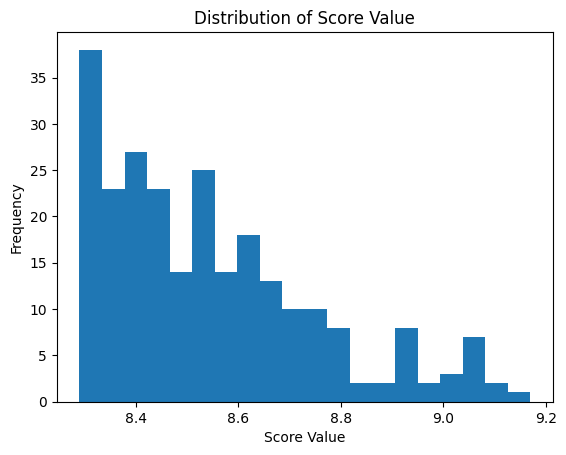

Summary Statistics:
Mean Score Value: 8.546679999999999
Median Score Value: 8.504999999999999
Minimum Score Value: 8.29
Maximum Score Value: 9.17
The distribution is positively skewed.
There is variation in Score Value.


In [11]:
# Plot a histogram of the Score Value with matplotlib.pyplot
plt.hist(scoreColumn, bins=20)
plt.xlabel('Score Value')
plt.ylabel('Frequency')
plt.title('Distribution of Score Value')
plt.show()


minValue = scoreColumn[0]
maxValue = scoreColumn[0]

for eleman in scoreColumn:
    if eleman < minValue:
        minValue = eleman
    if eleman > maxValue:
        maxValue = eleman

# Print the summary statistics and comments
print("Summary Statistics:")
print("Mean Score Value:", mean)
print("Median Score Value:", median)
print("Minimum Score Value:", minValue)
print("Maximum Score Value:", maxValue)

# Add comments about the data based on the summary statistics
if mean > median:
    print("The distribution is positively skewed.")
elif mean < median:
    print("The distribution is negatively skewed.")
else:
    print("The distribution is symmetric.")

if minValue == maxValue:
    print("All Score Values are the same.")
else:
    print("There is variation in Score Value.")

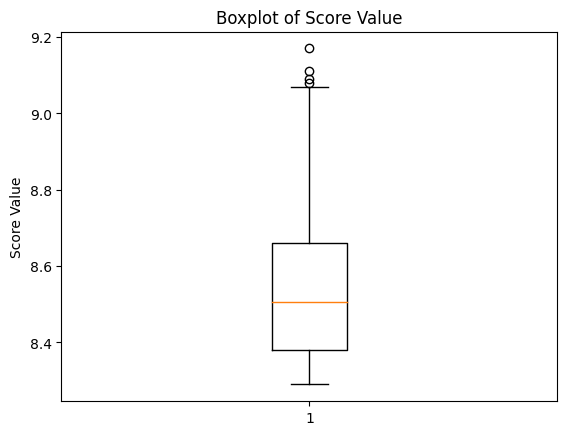

The distribution is positively skewed.


In [12]:
# Create a boxplot of the Score Value with matplotlib.pyplot
plt.boxplot(scoreColumn)
plt.ylabel('Score Value')
plt.title('Boxplot of Score Value')
plt.show()

# Add comments data based on the boxplot
if mean > median:
    print("The distribution is positively skewed.")
elif mean < median:
    print("The distribution is negatively skewed.")
else:
    print("The distribution is symmetric.")

In [13]:
#Take specific number of sample and construct %95 confidence 
#interval for the mean and variance

#Belirli sayıda örnek alın ve ortalama ve varyans için %95 güven aralığı oluşturun

sampleSize = 10
alpha = 0.05

# Rastgele örnekleme
samples = random.sample(scoreColumn, sampleSize)
sampleMean = sum(samples) / sampleSize

# Örneklem standart sapma
sampleSTD = math.sqrt(sum((x - sampleMean) ** 2 for x in samples) / (sampleSize - 1))

tCriticalPoint = 2.262  # df = 9, alpha/2 = 0.025 için

# Ortalama için güven aralığı
meanInterval = (sampleMean - tCriticalPoint * sampleSTD / math.sqrt(sampleSize), sampleMean + tCriticalPoint * sampleSTD / math.sqrt(sampleSize))

# Varyans için güven aralığı
varianceInterval = ((sampleSize - 1) * sampleSTD ** 2 / 19.023, (sampleSize - 1) * sampleSTD ** 2 / 2.700)

# Sonuçları yazdırma
print("95% Confidence Interval for the Mean:")
print(meanInterval)
print("\n95% Confidence Interval for the Variance:")
print(varianceInterval)


95% Confidence Interval for the Mean:
(8.37043, 8.67957)

95% Confidence Interval for the Variance:
(0.022091678494454123, 0.15564814814814842)


In [14]:
import scipy.stats as stats
# Specify the desired margin of error and confidence level
marginError = 0.1
confidenceLevel = 0.90

def calculateSampleSize(stdDevation, marginError, confidenceLevel):
    zScore = abs(stats.norm.ppf((1 - confidenceLevel) / 2))

    # Calculate the sample size
    sampleSize = (zScore*2 * stdDevation) / marginError*2

    # Round up to the nearest whole number
    sampleSize = math.ceil(sampleSize)

    return sampleSize


sampleSize = calculateSampleSize(stdDevation, marginError, confidenceLevel)
print("Sample Size:", sampleSize)

Sample Size: 14
